### TEMPORAL STABILITY FOR IN-SITU NETWORK STATIONS

Input contains informations from 11 in-situ stations by Date, Time, Station Code and Soil Moisture.

Each date contains 5 time cycle, therefore the "Hourly Mean" frequency time is calculated.

The code section includes:

1. Input Data Elaboration
    * Row Selection by station
    * Group by Frequency-Time
    * Filter for 0 < SM values < 0.8
2. Data Analysis
    * TS Plot
    * Mean Relative Difference
    * STD for bias
    * RMSE

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from scipy import stats
from sklearn.linear_model import LinearRegression
from matplotlib import rcParams

In [2]:
df = pd.read_csv('input.csv',index_col='DATE_TIME', parse_dates=True)

rcParams['figure.figsize'] = 18, 10
rcParams['lines.linewidth'] = 2


In [4]:
df

,Station_Name,SM
DATE_TIME,,
2015-01-01 00:00:00,Sg01,0.241282
2015-01-01 00:15:00,Sg01,0.241282
2015-01-01 00:30:00,Sg01,0.241012
2015-01-01 00:45:00,Sg01,0.241012
2015-01-01 01:00:00,Sg01,0.240742
...,...,...
2017-12-18 04:45:00,Sg05,0.225420
2017-12-18 05:00:00,Sg05,0.225420
2017-12-18 05:15:00,Sg05,0.225420


In [5]:
kk_sg1=df.loc[df['Station_Name'] == 'Sg01']
kk_sg2=df.loc[df['Station_Name'] == 'Sg02']
kk_sg3=df.loc[df['Station_Name'] == 'Sg03']
kk_sg4=df.loc[df['Station_Name'] == 'Sg04']
kk_sg5=df.loc[df['Station_Name'] == 'Sg05']
kk_sg6=df.loc[df['Station_Name'] == 'Sg06']
kk_sg7=df.loc[df['Station_Name'] == 'Sg07']
kk_sg8=df.loc[df['Station_Name'] == 'Sg08']
kk_sg9=df.loc[df['Station_Name'] == 'Sg09']
kk_sg10=df.loc[df['Station_Name'] == 'Sg10']
kk_sg11=df.loc[df['Station_Name'] == 'Sg11']


In [6]:
kk_sg1,kk_sg11

(                    Station_Name        SM
 DATE_TIME                                 
 2015-01-01 00:00:00         Sg01  0.241282
 2015-01-01 00:15:00         Sg01  0.241282
 2015-01-01 00:30:00         Sg01  0.241012
 2015-01-01 00:45:00         Sg01  0.241012
 2015-01-01 01:00:00         Sg01  0.240742
 ...                          ...       ...
 2017-11-29 13:15:00         Sg01  0.211590
 2017-11-29 13:30:00         Sg01  0.211590
 2017-11-29 13:45:00         Sg01  0.211590
 2017-11-29 14:00:00         Sg01  0.211320
 2017-11-29 14:15:00         Sg01  0.211320
 
 [98266 rows x 2 columns],
                     Station_Name        SM
 DATE_TIME                                 
 2015-01-01 00:00:00         Sg11  0.174579
 2015-01-01 00:15:00         Sg11  0.174579
 2015-01-01 00:30:00         Sg11  0.174579
 2015-01-01 00:45:00         Sg11  0.174579
 2015-01-01 01:00:00         Sg11  0.174579
 ...                          ...       ...
 2017-11-29 11:15:00         Sg11  0.273202
 20

In [7]:
fd_dt_sg1 = kk_sg1.groupby(pd.Grouper(freq='H')).mean()


fd_dt_sg2 = kk_sg2.groupby(pd.Grouper(freq='H')).mean()


fd_dt_sg3 = kk_sg3.groupby(pd.Grouper(freq='H')).mean()


fd_dt_sg4 = kk_sg4.groupby(pd.Grouper(freq='H')).mean()


fd_dt_sg5 = kk_sg5.groupby(pd.Grouper(freq='H')).mean()


fd_dt_sg6 = kk_sg6.groupby(pd.Grouper(freq='H')).mean()


fd_dt_sg7 = kk_sg7.groupby(pd.Grouper(freq='H')).mean()


fd_dt_sg8 = kk_sg8.groupby(pd.Grouper(freq='H')).mean()


fd_dt_sg9 = kk_sg9.groupby(pd.Grouper(freq='H')).mean()


fd_dt_sg10 = kk_sg10.groupby(pd.Grouper(freq='H')).mean()


fd_dt_sgk = kk_sg11.groupby(pd.Grouper(freq='H')).mean()


In [8]:
fd_dt_sg1,fd_dt_sgk

(                           SM
 DATE_TIME                    
 2015-01-01 00:00:00  0.241147
 2015-01-01 01:00:00  0.240877
 2015-01-01 02:00:00  0.241012
 2015-01-01 03:00:00  0.240742
 2015-01-01 04:00:00  0.240539
 ...                       ...
 2017-11-29 10:00:00  0.211185
 2017-11-29 11:00:00  0.211320
 2017-11-29 12:00:00  0.211455
 2017-11-29 13:00:00  0.211590
 2017-11-29 14:00:00  0.211320
 
 [25527 rows x 1 columns],
                            SM
 DATE_TIME                    
 2015-01-01 00:00:00  0.174579
 2015-01-01 01:00:00  0.174579
 2015-01-01 02:00:00  0.174579
 2015-01-01 03:00:00  0.174579
 2015-01-01 04:00:00  0.174579
 ...                       ...
 2017-11-29 08:00:00  0.271125
 2017-11-29 09:00:00  0.271385
 2017-11-29 10:00:00  0.272423
 2017-11-29 11:00:00  0.273202
 2017-11-29 12:00:00  0.273202
 
 [25525 rows x 1 columns])

In [9]:
fd_dt_sg11x=fd_dt_sg1.dropna()
fd_dt_sg22x=fd_dt_sg2.dropna()
fd_dt_sg33x=fd_dt_sg3.dropna()
fd_dt_sg44x=fd_dt_sg4.dropna()
fd_dt_sg55x=fd_dt_sg5.dropna()
fd_dt_sg66x=fd_dt_sg6.dropna()
fd_dt_sg77x=fd_dt_sg7.dropna()
fd_dt_sg88x=fd_dt_sg8.dropna()
fd_dt_sg99x=fd_dt_sg9.dropna()
fd_dt_sg10x=fd_dt_sg10.dropna()
fd_dt_sg111x=fd_dt_sgk.dropna()

In [10]:
fd_dt_sg11x,fd_dt_sg111x

(                           SM
 DATE_TIME                    
 2015-01-01 00:00:00  0.241147
 2015-01-01 01:00:00  0.240877
 2015-01-01 02:00:00  0.241012
 2015-01-01 03:00:00  0.240742
 2015-01-01 04:00:00  0.240539
 ...                       ...
 2017-11-29 10:00:00  0.211185
 2017-11-29 11:00:00  0.211320
 2017-11-29 12:00:00  0.211455
 2017-11-29 13:00:00  0.211590
 2017-11-29 14:00:00  0.211320
 
 [24570 rows x 1 columns],
                            SM
 DATE_TIME                    
 2015-01-01 00:00:00  0.174579
 2015-01-01 01:00:00  0.174579
 2015-01-01 02:00:00  0.174579
 2015-01-01 03:00:00  0.174579
 2015-01-01 04:00:00  0.174579
 ...                       ...
 2017-11-29 08:00:00  0.271125
 2017-11-29 09:00:00  0.271385
 2017-11-29 10:00:00  0.272423
 2017-11-29 11:00:00  0.273202
 2017-11-29 12:00:00  0.273202
 
 [25524 rows x 1 columns])

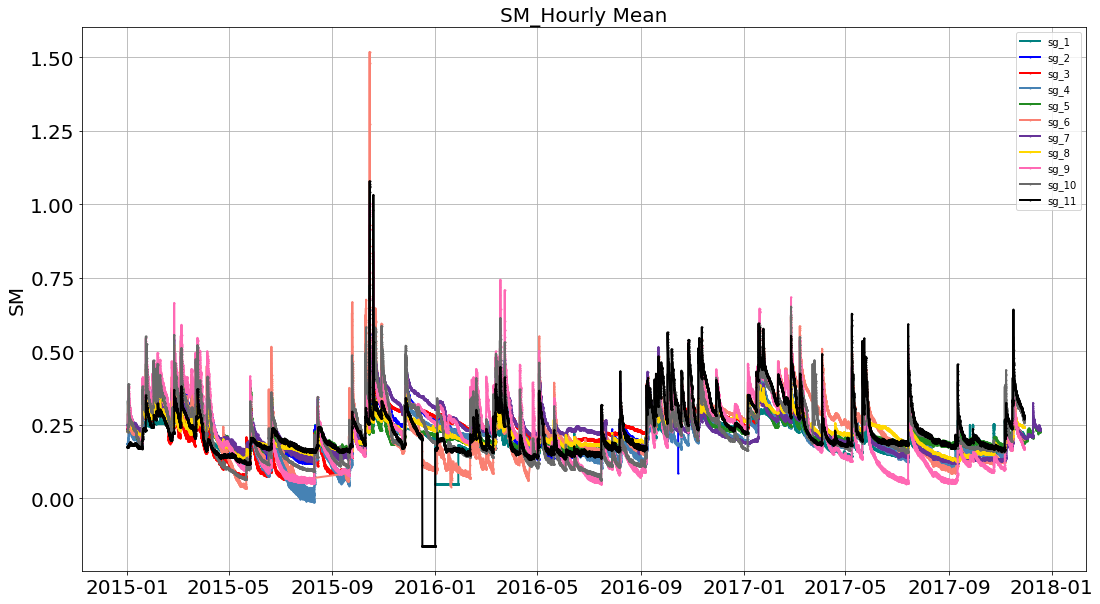

In [11]:
plt.title('SM_Hourly Mean', size=20)
plt.grid()
plt.plot(fd_dt_sg11x,'teal',label='sg_1',marker='o', markerfacecolor='teal', markeredgecolor='teal', markersize=1)
plt.plot(fd_dt_sg22x, 'blue',label='sg_2',marker='o', markerfacecolor='blue', markeredgecolor='blue', markersize=1)
plt.plot(fd_dt_sg33x, 'red',label='sg_3',marker='o', markerfacecolor='red', markeredgecolor='red', markersize=1)
plt.plot(fd_dt_sg44x, 'steelblue',label='sg_4',marker='o', markerfacecolor='steelblue', markeredgecolor='steelblue', markersize=1)
plt.plot(fd_dt_sg55x, 'forestgreen',label='sg_5',marker='o', markerfacecolor='forestgreen', markeredgecolor='forestgreen', markersize=1)
plt.plot(fd_dt_sg66x, 'salmon',label='sg_6',marker='o', markerfacecolor='salmon', markeredgecolor='salmon', markersize=1)
plt.plot(fd_dt_sg77x, 'rebeccapurple',label='sg_7',marker='o', markerfacecolor='rebeccapurple', markeredgecolor='rebeccapurple', markersize=1)
plt.plot(fd_dt_sg88x, 'gold',label='sg_8',marker='o', markerfacecolor='gold', markeredgecolor='gold', markersize=1)
plt.plot(fd_dt_sg99x, 'hotpink',label='sg_9',marker='o', markerfacecolor='hotpink', markeredgecolor='hotpink', markersize=1)
plt.plot(fd_dt_sg10x, 'dimgray',label='sg_10',marker='o', markerfacecolor='dimgray', markeredgecolor='dimgray', markersize=1)
plt.plot(fd_dt_sg111x, 'black',label='sg_11',marker='o', markerfacecolor='black', markeredgecolor='black', markersize=1)

plt.ylabel('SM',fontsize=20)


plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend();


### FILTER FOR THE INTERESTED SM RANGE


In [12]:

fd_dt_sg33xk = fd_dt_sg33x[~(fd_dt_sg33x["SM"] > 0.8)]
#fd_dt_sg33xk


In [13]:
fd_dt_sg44xk = fd_dt_sg44x[~(fd_dt_sg44x["SM"] < 0)]
#fd_dt_sg44xk

In [14]:
fd_dt_sg66xk = fd_dt_sg66x[~(fd_dt_sg66x["SM"] > 0.8)]
#fd_dt_sg66xk

In [15]:
fd_dt_sg99xk = fd_dt_sg99x[~(fd_dt_sg99x["SM"] > 0.8)]
#fd_dt_sg99xk

### FILTER BOTH NEGATIVE AND VALUES OVER 0.8 FOR THE STATION 11


In [16]:
fd_dt_sg111xk = fd_dt_sg111x[~((fd_dt_sg111x["SM"] < 0) | (fd_dt_sg111x["SM"] > 0.8))]
#fd_dt_sg111xk

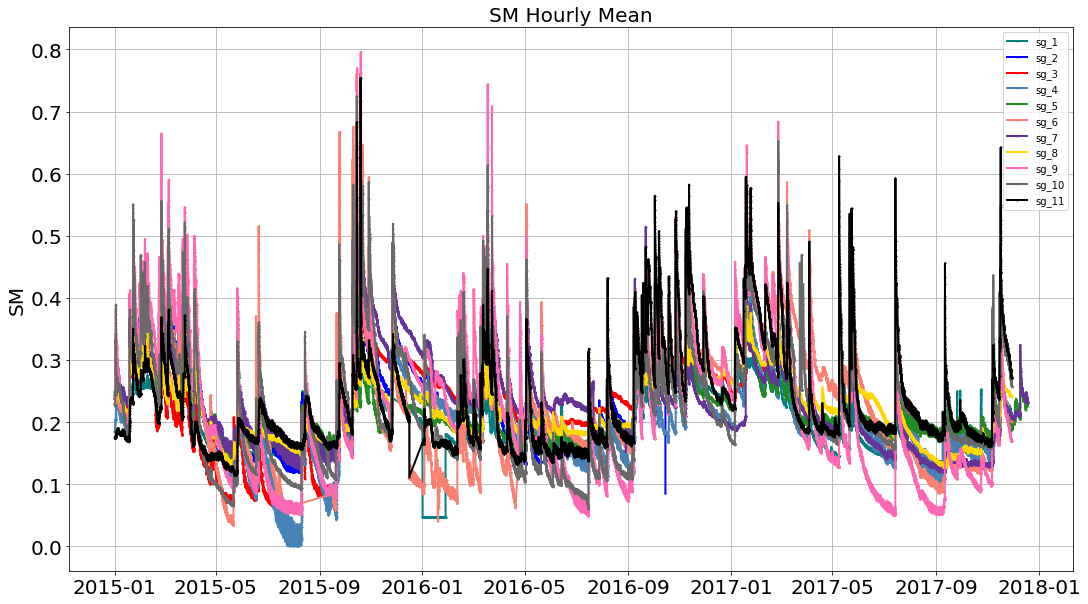

In [17]:
plt.title('SM Hourly Mean', size=20)
plt.grid()
plt.plot(fd_dt_sg11x,'teal',label='sg_1',marker='o', markerfacecolor='teal', markeredgecolor='teal', markersize=1)
plt.plot(fd_dt_sg22x, 'blue',label='sg_2',marker='o', markerfacecolor='blue', markeredgecolor='blue', markersize=1)
plt.plot(fd_dt_sg33xk, 'red',label='sg_3',marker='o', markerfacecolor='red', markeredgecolor='red', markersize=1)
plt.plot(fd_dt_sg44xk, 'steelblue',label='sg_4',marker='o', markerfacecolor='steelblue', markeredgecolor='steelblue', markersize=1)
plt.plot(fd_dt_sg55x, 'forestgreen',label='sg_5',marker='o', markerfacecolor='forestgreen', markeredgecolor='forestgreen', markersize=1)
plt.plot(fd_dt_sg66xk, 'salmon',label='sg_6',marker='o', markerfacecolor='salmon', markeredgecolor='salmon', markersize=1)
plt.plot(fd_dt_sg77x, 'rebeccapurple',label='sg_7',marker='o', markerfacecolor='rebeccapurple', markeredgecolor='rebeccapurple', markersize=1)
plt.plot(fd_dt_sg88x, 'gold',label='sg_8',marker='o', markerfacecolor='gold', markeredgecolor='gold', markersize=1)
plt.plot(fd_dt_sg99xk, 'hotpink',label='sg_9',marker='o', markerfacecolor='hotpink', markeredgecolor='hotpink', markersize=1)
plt.plot(fd_dt_sg10x, 'dimgray',label='sg_10',marker='o', markerfacecolor='dimgray', markeredgecolor='dimgray', markersize=1)
plt.plot(fd_dt_sg111xk, 'black',label='sg_11',marker='o', markerfacecolor='black', markeredgecolor='black', markersize=1)

plt.ylabel('SM',fontsize=20)


plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend();


In [18]:
from scipy import stats
import math


### CONCATENATE THE NEW OUTPUTS FOR THE CALCULATION OF:
* MRD
* STD
* RMSE

In [19]:
new_df_addzz = pd.concat([fd_dt_sg11x,fd_dt_sg22x,fd_dt_sg33xk,fd_dt_sg44xk,fd_dt_sg55x,fd_dt_sg66xk,fd_dt_sg77x,fd_dt_sg88x,fd_dt_sg99xk,fd_dt_sg10x,fd_dt_sg111xk], axis=1)
new_df_addzz.columns = ['sg1','sg2','sg3','sg4','sg5','sg6','sg7','sg8','sg9','sg10','sg11']
new_df_addzz

,sg1,sg2,sg3,sg4,sg5,sg6,sg7,sg8,sg9,sg10,sg11
DATE_TIME,,,,,,,,,,,
2015-01-01 00:00:00,0.241147,0.237593,0.238095,0.184615,0.242869,0.229014,0.247204,0.229010,0.243782,0.22856,0.174579
2015-01-01 01:00:00,0.240877,0.236819,0.238573,0.184615,0.244086,0.229589,0.248157,0.228667,0.243150,0.22856,0.174579
2015-01-01 02:00:00,0.241012,0.236561,0.238573,0.184615,0.244492,0.230164,0.248475,0.228210,0.242939,0.22856,0.174579
2015-01-01 03:00:00,0.240742,0.236046,0.238573,0.184615,0.245506,0.230164,0.248475,0.227982,0.242096,0.22856,0.174579
2015-01-01 04:00:00,0.240539,0.235917,0.238573,0.184615,0.246521,0.230164,0.249110,0.228096,0.241252,0.22856,0.174579
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-18 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.232270,NaN,NaN,NaN,NaN
2017-12-18 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.231794,NaN,NaN,NaN,NaN
2017-12-18 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.231317,NaN,NaN,NaN,NaN


In [20]:
mrd=new_df_addzz.dropna()
mrd

,sg1,sg2,sg3,sg4,sg5,sg6,sg7,sg8,sg9,sg10,sg11
DATE_TIME,,,,,,,,,,,
2015-01-01 00:00:00,0.241147,0.237593,0.238095,0.184615,0.242869,0.229014,0.247204,0.229010,0.243782,0.228560,0.174579
2015-01-01 01:00:00,0.240877,0.236819,0.238573,0.184615,0.244086,0.229589,0.248157,0.228667,0.243150,0.228560,0.174579
2015-01-01 02:00:00,0.241012,0.236561,0.238573,0.184615,0.244492,0.230164,0.248475,0.228210,0.242939,0.228560,0.174579
2015-01-01 03:00:00,0.240742,0.236046,0.238573,0.184615,0.245506,0.230164,0.248475,0.227982,0.242096,0.228560,0.174579
2015-01-01 04:00:00,0.240539,0.235917,0.238573,0.184615,0.246521,0.230164,0.249110,0.228096,0.241252,0.228560,0.174579
...,...,...,...,...,...,...,...,...,...,...,...
2016-09-12 09:00:00,0.247355,0.299057,0.294168,0.296342,0.277766,0.328213,0.328546,0.268896,0.301344,0.281829,0.335490
2016-09-12 10:00:00,0.247153,0.297338,0.294008,0.300057,0.278172,0.324475,0.328228,0.268096,0.299446,0.281116,0.335230
2016-09-12 11:00:00,0.246950,0.296134,0.294008,0.303507,0.278780,0.320450,0.327434,0.267639,0.296494,0.280878,0.334452


In [21]:
mrd_mean=mrd.mean()
mrd_mean

sg1     0.183608
sg2     0.220973
sg3     0.215955
sg4     0.211195
sg5     0.220000
sg6     0.210534
sg7     0.249889
sg8     0.214676
sg9     0.227665
sg10    0.204132
sg11    0.200898
dtype: float64

In [22]:
mrd.sg1

DATE_TIME
2015-01-01 00:00:00    0.241147
2015-01-01 01:00:00    0.240877
2015-01-01 02:00:00    0.241012
2015-01-01 03:00:00    0.240742
2015-01-01 04:00:00    0.240539
                         ...   
2016-09-12 09:00:00    0.247355
2016-09-12 10:00:00    0.247153
2016-09-12 11:00:00    0.246950
2016-10-14 23:00:00    0.255251
2016-10-15 00:00:00    0.255385
Name: sg1, Length: 12003, dtype: float64

In [23]:
mrd_sg1=(mrd.sg1-mrd_mean.sg1)
mrd_sg2=(mrd.sg2-mrd_mean.sg2)
mrd_sg3=(mrd.sg3-mrd_mean.sg3)
mrd_sg4=(mrd.sg4-mrd_mean.sg4)
mrd_sg5=(mrd.sg5-mrd_mean.sg5)
mrd_sg6=(mrd.sg6-mrd_mean.sg6)
mrd_sg7=(mrd.sg7-mrd_mean.sg7)
mrd_sg8=(mrd.sg8-mrd_mean.sg8)
mrd_sg9=(mrd.sg9-mrd_mean.sg9)
mrd_sg10=(mrd.sg10-mrd_mean.sg10)
mrd_sg11=(mrd.sg11-mrd_mean.sg11)


In [24]:
mrd_sg1

DATE_TIME
2015-01-01 00:00:00    0.057539
2015-01-01 01:00:00    0.057269
2015-01-01 02:00:00    0.057404
2015-01-01 03:00:00    0.057134
2015-01-01 04:00:00    0.056932
                         ...   
2016-09-12 09:00:00    0.063747
2016-09-12 10:00:00    0.063545
2016-09-12 11:00:00    0.063343
2016-10-14 23:00:00    0.071643
2016-10-15 00:00:00    0.071778
Name: sg1, Length: 12003, dtype: float64

In [25]:
mrd_mean_sg11=mrd_sg1.mean()
mrd_mean_sg22=mrd_sg2.mean()
mrd_mean_sg33=mrd_sg3.mean()
mrd_mean_sg44=mrd_sg4.mean()
mrd_mean_sg55=mrd_sg5.mean()
mrd_mean_sg66=mrd_sg6.mean()
mrd_mean_sg77=mrd_sg7.mean()
mrd_mean_sg88=mrd_sg8.mean()
mrd_mean_sg99=mrd_sg9.mean()
mrd_mean_sg100=mrd_sg10.mean()
mrd_mean_sg111=mrd_sg11.mean()

In [26]:
#print("MRD MEAN\n",mrd_mean_sg11,mrd_mean_sg22,mrd_mean_sg33,mrd_mean_sg44,mrd_mean_sg55,mrd_mean_sg66,mrd_mean_sg77,mrd_mean_sg88,mrd_mean_sg99,mrd_mean_sg100,mrd_mean_sg111)

In [27]:
std_sg1=mrd_sg1.std()
std_sg2=mrd_sg2.std()
std_sg3=mrd_sg3.std()
std_sg4=mrd_sg4.std()
std_sg5=mrd_sg5.std()
std_sg6=mrd_sg6.std()
std_sg7=mrd_sg7.std()
std_sg8=mrd_sg8.std()
std_sg9=mrd_sg9.std()
std_sg10=mrd_sg10.std()
std_sg11=mrd_sg11.std()


In [28]:
#print("STD",std_sg1,std_sg2,std_sg3,std_sg4,std_sg5,std_sg6,std_sg7,std_sg8,std_sg9,std_sg10,std_sg11)

In [29]:
rmse_rd_sg1=(np.sqrt((mrd_mean_sg11 **2)+std_sg1))
rmse_rd_sg2=(np.sqrt((mrd_mean_sg22 **2)+std_sg2))
rmse_rd_sg3=(np.sqrt((mrd_mean_sg33 **2)+std_sg3))
rmse_rd_sg4=(np.sqrt((mrd_mean_sg44 **2)+std_sg4))
rmse_rd_sg5=(np.sqrt((mrd_mean_sg55 **2)+std_sg5))
rmse_rd_sg6=(np.sqrt((mrd_mean_sg66 **2)+std_sg6))
rmse_rd_sg7=(np.sqrt((mrd_mean_sg77 **2)+std_sg7))
rmse_rd_sg8=(np.sqrt((mrd_mean_sg88 **2)+std_sg8))
rmse_rd_sg9=(np.sqrt((mrd_mean_sg99 **2)+std_sg9))
rmse_rd_sg10=(np.sqrt((mrd_mean_sg100 **2)+std_sg10))
rmse_rd_sg11=(np.sqrt((mrd_mean_sg111 **2)+std_sg11))


(-0.6, 0.6)

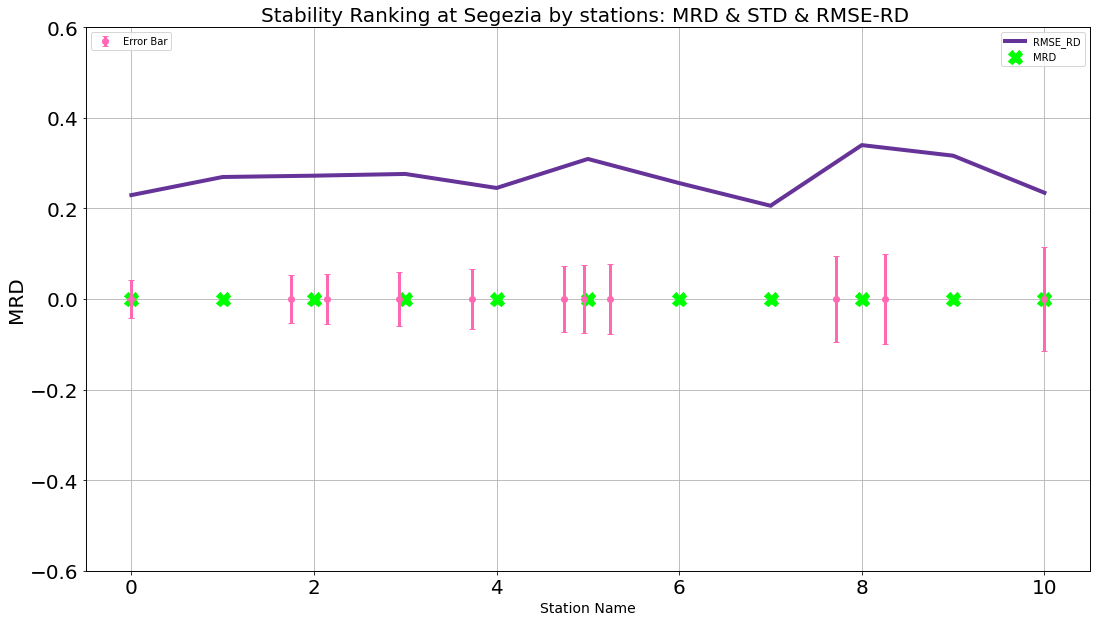

In [30]:
fig, ax1 = plt.subplots()
plt.title('Stability Ranking at Segezia by stations: MRD & STD & RMSE-RD ', size=20)

column_std = std_sg1,std_sg2,std_sg3,std_sg4,std_sg5,std_sg6,std_sg7,std_sg8,std_sg9,std_sg10,std_sg11
column_mrd= mrd_mean_sg11,mrd_mean_sg22,mrd_mean_sg33,mrd_mean_sg44,mrd_mean_sg55,mrd_mean_sg66,mrd_mean_sg77,mrd_mean_sg88,mrd_mean_sg99,mrd_mean_sg100,mrd_mean_sg111
column_rmse_rd = rmse_rd_sg1,rmse_rd_sg2,rmse_rd_sg3,rmse_rd_sg4,rmse_rd_sg5,rmse_rd_sg6,rmse_rd_sg7,rmse_rd_sg8,rmse_rd_sg9,rmse_rd_sg10,rmse_rd_sg11

color2='black'
ax1.plot(column_rmse_rd,'rebeccapurple',linewidth=4, marker='o', markerfacecolor='rebeccapurple', markeredgecolor='rebeccapurple', markersize=1, label='RMSE_RD')
ax1.plot(column_mrd,'gold',marker='X', markerfacecolor='lime', markeredgecolor='lime', markersize=14,linestyle="", label='MRD')
ax1.legend(loc='upper left');
ax1.set_xlabel("Station Name", fontsize=14,color=color2 )
ax1.set_ylabel("MRD", fontsize=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
ax1.grid()
ax1.legend()

ax2 = ax1.twiny()
ax2.errorbar(column_rmse_rd,column_mrd,yerr = column_std,fmt='o',ecolor = 'hotpink',color='hotpink',elinewidth=3,capsize=3,label='Error Bar')
plt.xticks([])
ax2.legend()

ax2.legend(loc='upper left');

ax2.set_ylim([-0.6,0.6])

